## 1. `scipy.stats.ttest_1samp`
- 예제
```python
t_stat, p_value = stats.ttest_1samp(data, popmean=70)
```

    - 단일 표본 t-검정, 주어진 데이터셋의 평균이 모집단의 특정 평균과 다른지 검정

- 하이퍼파라미터
    - `a`: 검정할 데이터 배열.
    - `popmean`: 모집단의 가설 평균.
    - `axis`: 계산할 축. 기본값 0.
    - `nan_policy`: 'propagate', 'raise', 'omit' 중 선택.   
        - 'omit'은 NaN 값을 무시.


## 2. `scipy.stats.ttest_ind`
- **예제**:
```python
t_stat, p_value = stats.ttest_ind(group1, group2)
```
    - 독립 표본 t-검정으로, 두 독립적인 그룹의 평균이 동일한지 검정



- 하이퍼파라미터
    - `a, b`: 두 그룹의 데이터 배열.
    - `axis`: 계산할 축. 기본값 0.
    - `equal_var`: 두 표본의 분산이 동일하다고 가정할지 여부. 기본값 True.
    - `nan_policy`: 'propagate', 'raise', 'omit' 중 선택.



## 3. `scipy.stats.ttest_rel`
- 예제
```python
t_stat, p_value = stats.ttest_rel(before, after)
```
    - 대응 표본 t-검정으로, 동일한 집단의 두 조건 간의 평균 차이를 검정합니다.

- 하이퍼파라미터
    - `a, b`: 대응되는 두 조건의 데이터 배열.
    - `axis`: 계산할 축. 기본값 0.
    - `nan_policy`: 'propagate', 'raise', 'omit' 중 선택.

## 4. `scipy.stats.chi2_contingency`
- 예제
```python
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
```
    - 카이제곱 검정으로, 범주형 데이터의 두 차원이 독립적인지 여부를 검정

- 하이퍼파라미터
    - `observed`: 관측된 데이터의 교차표.
    - `correction`: Yates의 수정 여부. 기본값 True.
    - `lambda_`: Box-Cox 변환을 위한 매개변수. 기본값 None.

- 출력값
    - `chi2`: 카이제곱 통계량.
    - `p`: p-값.
    - `dof`: 자유도.
    - `expected`: 기대 빈도.



## 5. `scipy.stats.f_oneway`
- 예제
```python
f_stat, p_value = stats.f_oneway(group1, group2, group3)
```
    - 일원 분산 분석 (ANOVA)으로, 세 개 이상의 그룹 간의 평균 차이가 유의미한지 검정합니다.

- 하이퍼파라미터
    - `*args`: 그룹 데이터 배열들.

> ## 요약
- `ttest_1samp`: 단일 표본 t-검정.
- `ttest_ind`: 독립 표본 t-검정.
- `ttest_rel`: 대응 표본 t-검정.
- `chi2_contingency`: 카이제곱 검정.
- `f_oneway`: 일원 분산 분석 (ANOVA).

### **무작위 추출 (Simple Random Sampling)**:
- `data.sample(n=n, random_state=1)`을 사용하여 n개의 표본을 무작위로 추출
- `random_state`를 설정하여 결과를 재현할 수 있음

### **층화 추출 (Stratified Sampling)**:
- 데이터프레임을 그룹별로 나눈 후, 각 그룹에서 동일한 비율로 표본을 추출
- `groupby('Group')`으로 그룹화한 후, 각 그룹에서 `sample(frac=n, random_state=1)`을 사용하여 각 그룹의 n * 10%를 추출

### **군집 추출 (Cluster Sampling)**:
- `Group` 열을 클러스터로 보고 하나의 클러스터를 무작위로 선택
- `data['Group'].unique()`를 사용하여 고유한 그룹을 추출하고, `np.random.choice(clusters)`로 하나의 클러스터를 무작위로 선택
- 선택된 클러스터에 해당하는 데이터를 추출

### **계통 추출 (Systematic Sampling)**:
- `k`번째 항목을 선택하는 방법
- `data.iloc[::k, :]`을 사용하여 전체 데이터에서 `k`번째 간격으로 표본을 추출


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터셋 생성
np.random.seed(10)
data = pd.DataFrame({
    'Feature1':np.random.randn(200),
    'Feature2':np.random.randn(200),
    'Group':np.random.choice(['A','B','C','D'],200)
})

In [ ]:
# 데이터셋 생성
np.random.seed(10)
data2 = pd.DataFrame({
    'Feature3':np.random.randn(300),
    'Feature4':np.random.randn(300),
    'Group':np.random.choice(['Group1','Group2','Group3','Group4'],300)
})

data2.sample(n=10, random_state=1)

,Feature3,Feature4,Group
189,0.781775,-0.246487,Group2
123,2.465325,0.794698,Group3
185,0.117181,-1.373114,Group4
213,-0.372761,-0.353763,Group1
106,-0.295984,1.397819,Group3
127,0.166810,0.327575,Group1
176,0.548428,0.170295,Group2
73,0.989072,-2.176609,Group3
275,0.210451,-0.896308,Group2
242,-1.442299,0.562922,Group1


In [ ]:
# 무작위 추출
data.sample(n=10, random_state=1)

,Feature1,Feature2,Group
58,-0.112272,-0.036383,C
40,0.660232,-2.017719,B
34,1.308473,0.095763,D
102,-0.922909,-0.239956,A
184,2.225050,0.759471,D
198,1.167168,-0.266502,A
95,0.918269,0.356939,C
4,0.621336,-1.130475,D
29,0.613204,-0.037918,C
168,0.274173,0.025808,A


In [ ]:
## 층화 추출
data.groupby('Group', group_keys=False).apply(lambda x:x.sample(frac=0.1, random_state=1))

<ipython-input-7-cf5ac11d7f21>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby('Group', group_keys=False).apply(lambda x:x.sample(frac=0.1, random_state=1))


,Feature1,Feature2,Group
120,-0.573113,1.101136,A
141,-1.359311,0.609282,A
166,-0.333101,0.197272,A
152,1.344549,-0.235082,A
11,1.203037,1.342179,A
128,1.656717,1.079731,B
9,-0.174600,-1.586552,B
112,2.404326,1.817783,B
195,1.255174,0.804267,B
140,-0.287629,1.156689,B


In [ ]:
# 층화 추출
data2.groupby('Group', group_keys=False).apply(lambda x:x.sample(frac=0.1, random_state=1))

<ipython-input-8-1bcc25b51a06>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data2.groupby('Group', group_keys=False).apply(lambda x:x.sample(frac=0.1, random_state=1))


,Feature3,Feature4,Group
72,-0.215790,0.653662,Group1
196,0.947126,0.056315,Group1
35,0.195013,1.008283,Group1
255,1.412064,-0.049997,Group1
191,-0.207279,0.480789,Group1
100,0.117476,0.462386,Group1
140,-0.287629,-1.680446,Group1
263,-1.068568,-1.857358,Group2
107,0.848209,0.124667,Group2
129,0.667890,-0.459926,Group2


In [ ]:
# 군집추출: 특정 군집을 지정해서 추출

cls = data['Group'].unique()
selected_cls = np.random.choice(cls)
cluster_sample = data[data['Group']== selected_cls]
cluster_sample

,Feature1,Feature2,Group
0,1.331587,0.133137,A
8,0.004291,-0.822368,A
11,1.203037,1.342179,A
19,-1.079805,1.194351,A
20,-1.977728,-0.563506,A
23,2.384967,-1.533069,A
31,-0.549309,0.591453,A
51,0.289094,-0.290246,A
54,0.842225,0.068801,A
56,2.394704,-0.686216,A


In [ ]:
# 군집추출 Cluster Sampling
# 특정 군집을 지정해서 추출

cls2 = data2['Group'].unique()
selected_cls2 = np.random.choice(cls2)
cluster_sample2 = data2[data2['Group']== selected_cls2]
cluster_sample2

,Feature3,Feature4,Group
6,0.265512,1.611457,Group4
8,0.004291,0.485003,Group4
9,-0.174600,-1.658605,Group4
10,0.433026,2.679910,Group4
17,0.135137,-0.166405,Group4
...,...,...,...
282,0.885775,-0.770412,Group4
287,0.011023,-0.997006,Group4
290,-0.857523,-2.816001,Group4
291,-0.364278,0.109544,Group4


In [ ]:
# 계통추출

k = 10
systematic_sample_data=data.iloc[::k,:]
systematic_sample_data

,Feature1,Feature2,Group
0,1.331587,0.133137,A
10,0.433026,-0.401473,C
20,-1.977728,-0.563506,A
30,-0.267317,-1.004716,B
40,0.660232,-2.017719,B
50,-0.025905,-0.132574,D
60,-0.232182,1.902304,D
70,0.319356,0.192936,B
80,1.985085,-1.269820,D
90,1.107708,-0.857523,A


In [ ]:
# 계통추출

k = 10
systematic_sample_data2=data2.iloc[::k,:]
systematic_sample_data2

,Feature3,Feature4,Group
0,1.331587,0.755300,Group3
10,0.433026,2.679910,Group4
20,-1.977728,1.101136,Group2
30,-0.267317,-1.515076,Group3
40,0.660232,1.156689,Group1
50,-0.025905,-1.635587,Group1
60,-0.232182,0.189420,Group3
70,0.319356,0.884368,Group4
80,1.985085,-0.614305,Group3
90,1.107708,0.226126,Group3


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


tt = sns.load_dataset('titanic')

titanic=tt.dropna(subset='age')
# 결측치 많아서 드랍
titanic.drop('deck', axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 타이타닉 데이터를 전체를 모르는 상황
# 샘플 표본 추출해서 표본 추출을 가지고 -> 추정량 계산 -> 신뢰구간 계산 -> 전체 데이터 모집단 비교
# 표본에 대한 값으로 모집단 Age를 추정해보기

# 표본크기
sample_size= 15
np.random.seed(1)

# 무작위 추출
sp = titanic['age'].sample(n=sample_size, random_state=1)

In [ ]:
len(titanic), len(sp)

(714, 15)

In [ ]:
# 평균, 표준오차 계산
sample_mean=sp.mean()
sample_std=sp.std(ddof=1)

# 표준오차
std_error = sample_std/np.sqrt(sample_size)

sample_mean, sample_std, std_error

(30.233333333333334, 14.371184793918433, 3.710623958141024)

In [ ]:
# 신뢰구간: 99%
cof_level= 0.99
degrees_freedom = sample_size - 1

# 신뢰구간 stats를 이용해 구하기
# 신뢰구간 level, 자유도, 샘플 평균, 샘플 표준오차
cof_interval=stats.t.interval(cof_level, degrees_freedom,sample_mean, std_error )

# 결과 출력
print(f'표본 크키 :{sample_size}')
print(f"표본 평균 :{sample_mean:.3f}")
print(f"표준 오차 :{std_error:.3f}")
print(f"{cof_level*100:.0f}% 신뢰구간 :{cof_interval}")

# 전체 데이터 비교
tt_mean = titanic['age'].mean()
print(f'모집단 평균 : {tt_mean:.3f}')

표본 크키 :15
표본 평균 :30.233
표준 오차 :3.711
99% 신뢰구간 :(19.187389363558882, 41.27927730310779)
모집단 평균 : 29.699


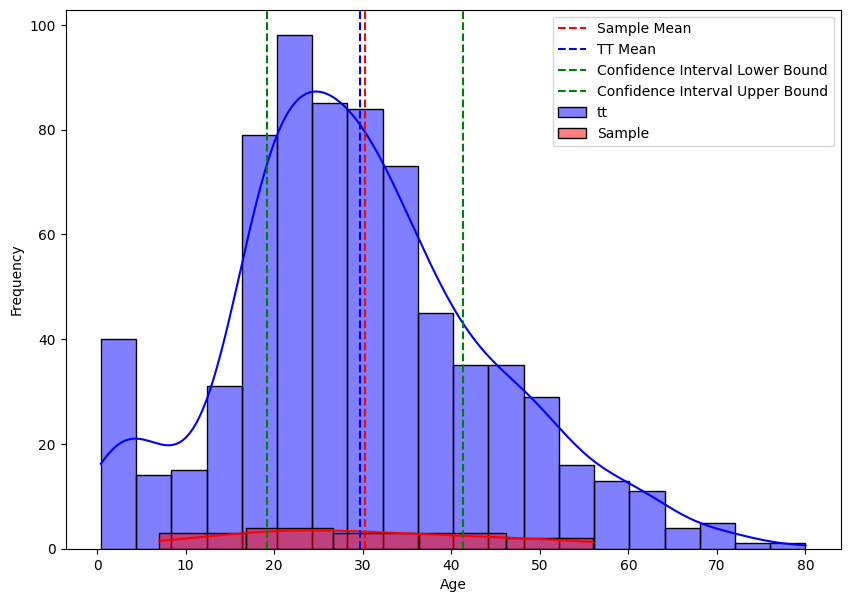

In [ ]:
# 시각화

plt.figure(figsize=(10,7))
sns.histplot(titanic['age'], kde=True, color='blue', label='tt')
sns.histplot(sp, kde=True, color='red', label='Sample', alpha=0.5)
plt.axvline(sample_mean, color= 'red', linestyle='--', label='Sample Mean')
plt.axvline(tt_mean, color= 'blue', linestyle='--', label='TT Mean')
plt.axvline(cof_interval[0], color= 'green', linestyle='--', label='Confidence Interval Lower Bound')
plt.axvline(cof_interval[1], color= 'green', linestyle='--', label='Confidence Interval Upper Bound')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()